In [1]:
# Stop warnings
import warnings
warnings.filterwarnings("ignore")

# General imports
import cortex
import importlib
import ipdb
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd
sys.path.append("{}/../../../../utils".format(os.getcwd()))
from surface_utils import load_surface ,make_surface_image
from pycortex_utils import set_pycortex_config_file,get_rois, draw_cortex

In [2]:
with open('../../../../settings.json') as f:
    json_s = f.read()
    analysis_info = json.loads(json_s)
rois = analysis_info["rois"]
formats = analysis_info['formats']
extensions = analysis_info['extensions']



In [3]:
subject = 'sub-02'
atlas_name =None
surf_size = None
roi_verts_dict_L, roi_verts_dict_R = get_rois(subject, 
                                              return_concat_hemis=False, 
                                              rois=rois, 
                                              mask=True, 
                                              atlas_name=atlas_name, 
                                              surf_size=surf_size)

In [4]:
output_array = np.zeros(len(next(iter(roi_verts_dict_L.values()))), dtype=int)  # dtype=int pour clarifier que c'est un tableau d'entiers

# Assigner un numéro unique à chaque position True dans chaque tableau
for i, (key, mask) in enumerate(roi_verts_dict_L.items(), 1):
    output_array[mask] = i
    

Fontconfig warning: ignoring UTF-8: not a valid region tag


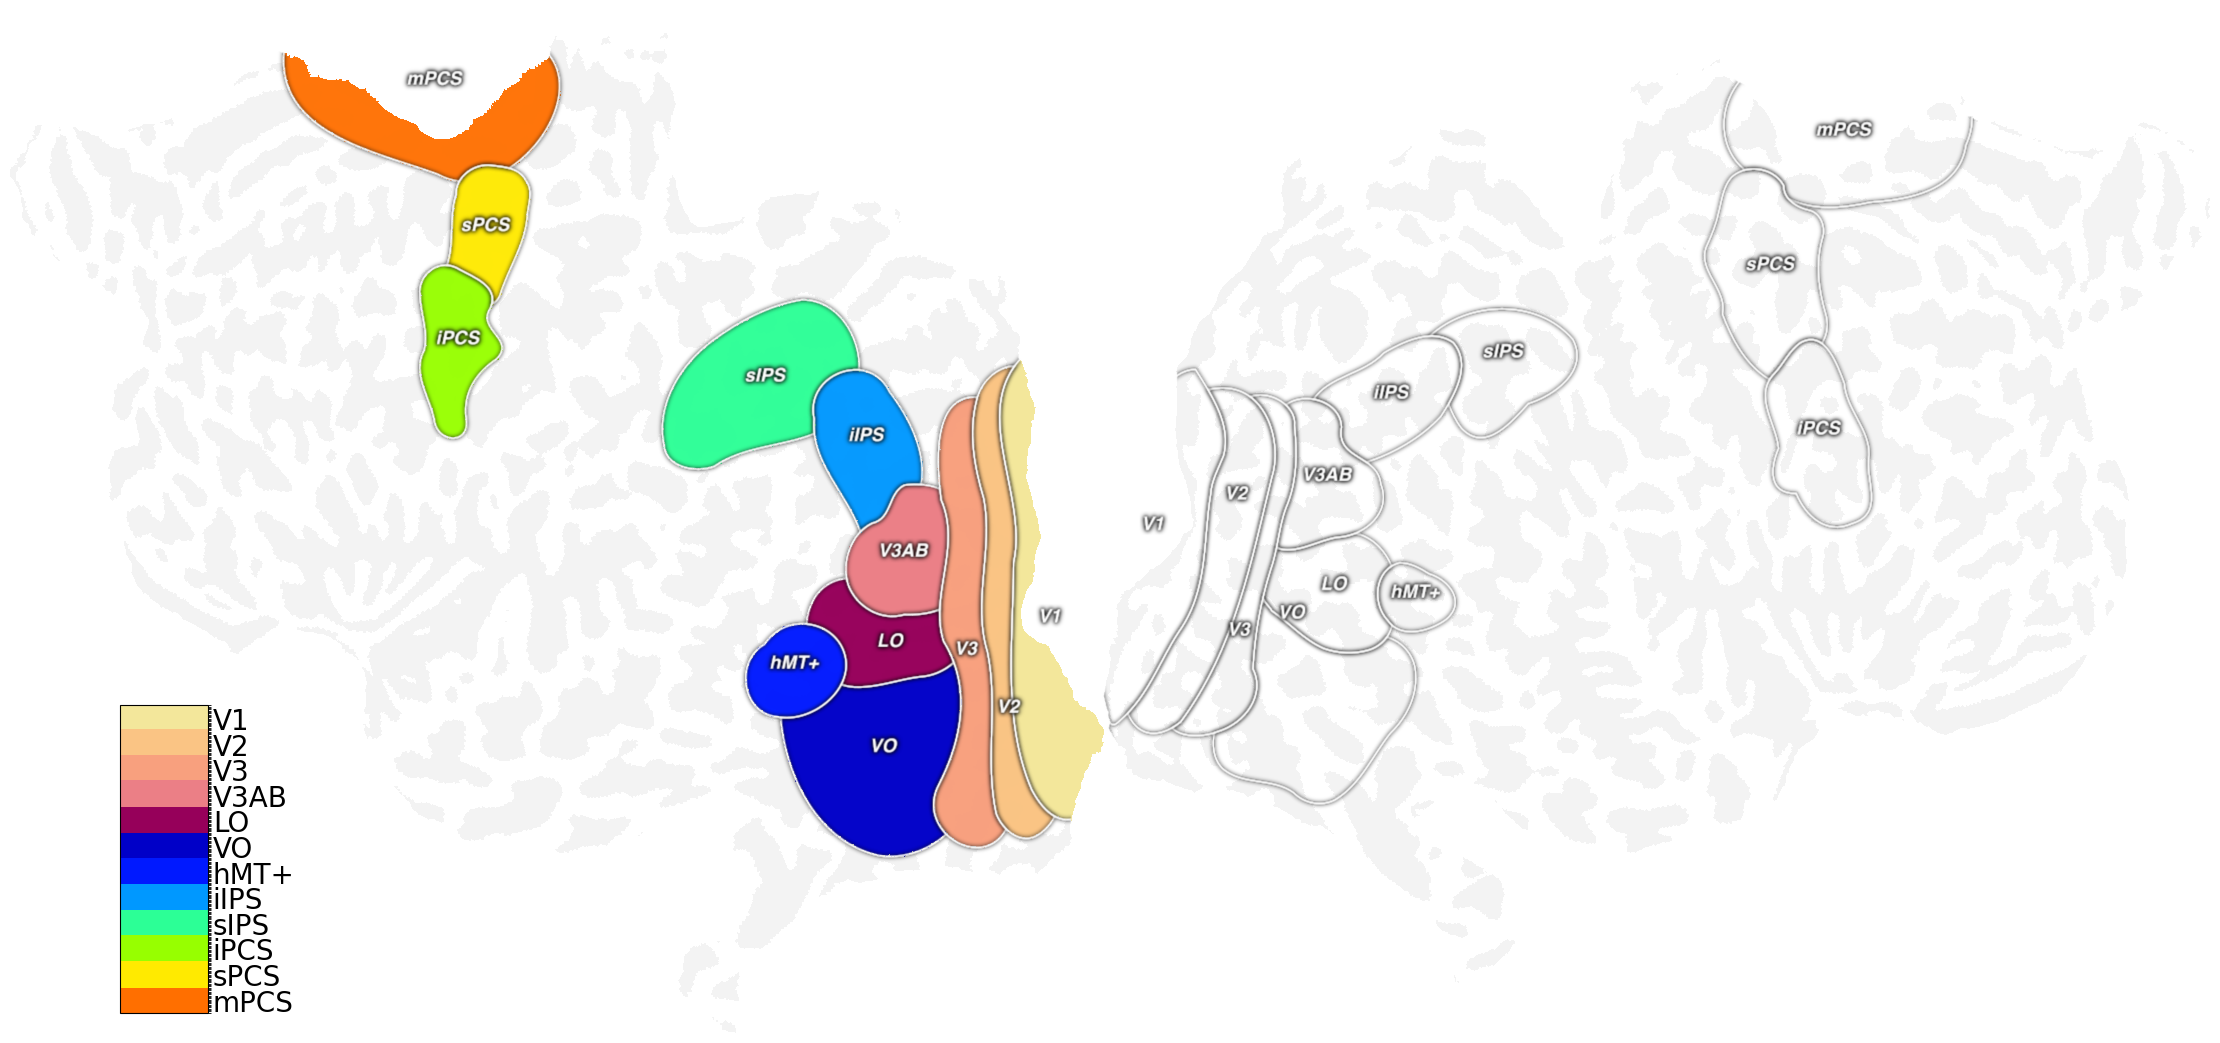

In [5]:
param = {'subject': subject,
    'data': output_array, 
             'cmap': 'rois_colors', 
             'alpha': output_array, 
             'vmin': 0, 
             'vmax': 12, 
             'cbar': 'rois', 
             'cortex_type': 'VertexRGB',
             'description': '',
             'curv_brightness': 1, 
             'curv_contrast': 0.1, 
             'add_roi': False,
             'cbar_label': '',
             'with_labels': True}



a = draw_cortex(**param)

In [ ]:
subjects = ['sub-02']
for subject in subjects :
    for format_, extension in zip(formats, extensions): 
        rois_dir = '{}/{}/derivatives/pp_data/{}/{}/rois'.format(main_dir, project_dir, subject, format_)
        os.makedirs(rois_fn, exist_ok=True)
        if format_ == 'fsnsative':
            # Load rois 
            roi_verts_dict_L, roi_verts_dict_R = get_rois(subject, 
                                              return_concat_hemis=False, 
                                              rois=rois, 
                                              mask=True, 
                                              atlas_name=None, 
                                              surf_size=None)
            for hemi in ['hemi-L','hemi-R']:
                if hemi == 'hemi-L':roi_verts_dict = roi_verts_dict_L
                elif hemi == 'hemi-R':roi_verts_dict = roi_verts_dict_R
                array_rois = np.zeros(len(next(iter(roi_verts_dict.values()))), dtype=int)  
                for i, (key, mask) in enumerate(roi_verts_dict.items(), 1):
                    array_rois[mask] = i
                
                # Exporte data 
                rois_fn = '{}_{}_rois.{}'.format(hemi,extension)
   
                
                

                
        elif format_ == '170k':
            roi_verts_dict = get_rois(subject, 
                                      return_concat_hemis=True, 
                                      rois=rois, 
                                      mask=True, 
                                      atlas_name='group_mmp', 
                                      surf_size='170k')

            array_rois = np.zeros(len(next(iter(roi_verts_dict.values()))), dtype=int)  
            for i, (key, mask) in enumerate(roi_verts_dict.items(), 1):
                array_rois[mask] = i

            # Exporte data 
            rois_fn = '{}_rois.{}'.format(extension)
    